In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)

In [2]:
# read data - (Miocene exp. with PI-aerosols)

path = '/scratch/pchen25/clim680_dataset/MidMiocene/atm/'
file_name = 'B.MMIOx2_C5_280_WISOon_ANN_concat.nc'
ds = xr.open_dataset(path+file_name)

ds

<xarray.Dataset>
Dimensions:        (lev: 30, ilev: 31, time: 12, lat: 96, lon: 144, slat: 95, slon: 144, nbnd: 2)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time           (time) object 1949-08-02 12:00:00 ... 1950-07-02 12:00:00
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Dimensions without coordinates: nbnd
Data variables: (12/211)
    hyam           (lev) float64 ...
    hybm           (lev) float64 ...
    hyai           (ilev) float64 ...
    hybi           (ilev) float64 ...
    P0             float64 ...
    date           (time) int32 ...
    ...             ...
    pom_a1_SRF     (time, lat, lon) float32 ...
    so4_a1_SRF     (time, lat, lon) float32 ...
    so4_a2_SRF     (time, lat, lon) float32 ...
    so4_a3_SRF     (time, lat, lon) float32 ...
    soa_a1_SRF     (time, lat, lon) float32 ...
    soa_a2_SRF     (time, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             B.MMIOx2_C5_280_WISOon
    title:            UNSET
    logname:          pacosta
    host:             r8i0n31
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/scratch/pacosta/B.MMIOx2_C5_280_WISOon/run/B.MMI...
    topography_file:  /glade/work/pacosta/PaleoBC/heroldn/gx1vMIO/cami_bnd_to...
    history:          Mon Jun 26 07:11:31 2023: ncrcat -O B.MMIOx2_C5_280_WIS...
    NCO:              netCDF Operators version 5.1.4 (Homepage = http://nco.s...

In [3]:
# input mask

var = 'LANDFRAC'
mask = ds[var][0,:,:]

mask

<xarray.DataArray 'LANDFRAC' (lat: 96, lon: 144)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    time     object 1949-08-02 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         fraction
    long_name:     Fraction of sfc area covered by land
    cell_methods:  time: mean

In [4]:
# input variables

var = 'TS'
ts_PI = ds[var]

ts_PI

<xarray.DataArray 'TS' (time: 12, lat: 96, lon: 144)>
[165888 values with dtype=float32]
Coordinates:
  * time     (time) object 1949-08-02 12:00:00 ... 1950-07-02 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

In [5]:
# input the first time step of the variable

ts_PI_jan = ds[var][0,:,:]

ts_PI_jan

<xarray.DataArray 'TS' (lat: 96, lon: 144)>
array([[257.2122 , 257.20352, 257.19232, ..., 257.19702, 257.1863 , 257.2139 ],
       [258.60028, 258.86688, 259.2956 , ..., 258.94598, 258.78848, 258.7769 ],
       [257.83508, 258.04642, 258.90424, ..., 258.456  , 258.61673, 258.68323],
       ...,
       [253.92834, 253.85028, 253.75427, ..., 254.16956, 254.08917, 254.01598],
       [253.01599, 252.97458, 252.91357, ..., 253.15067, 253.09364, 253.04652],
       [252.55693, 252.55118, 252.54453, ..., 252.58008, 252.57245, 252.56516]],
      dtype=float32)
Coordinates:
    time     object 1949-08-02 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

''

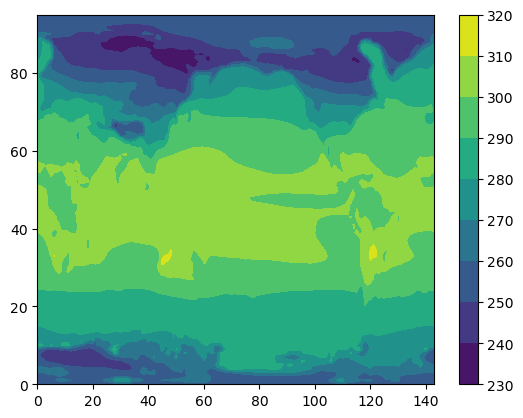

In [6]:
# ========= (1a) - countour ============

plt.contourf(ts_PI_jan)
plt.colorbar()
;

In [7]:
# ========= (1b) - plot on a map ============

# Add cyclic point to data
data = ts_PI_jan
data, lons = add_cyclic_point(data, coord=ds['lon'])
mask, mask_lons = add_cyclic_point(mask, coord=ds['lon'])

In [8]:
def plot_map(data, plot_title, lev_min, lev_max, interval, divnorm):
    
    # Make a figure and set its size
    fig = plt.figure(figsize=(11,8.5))
    
    # Set the axes using the specified map projection (ex: Robinson)
    ax = plt.axes(projection=ccrs.Robinson())
    
    # Contour plot
    cs=ax.contourf(lons,ds['lat'],data, levels = np.linspace(lev_min, lev_max, interval),
                   transform = ccrs.PlateCarree(),
                   cmap='RdBu_r', norm=divnorm, extend='both')

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=['bottom'], 
                      xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30))
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False

    # Add coastines in Miocene Scenario
    ax.contour(lons, ds['lat'], mask, [0.5,1.5],
               transform = ccrs.PlateCarree(),
               colors='k', linewidths=3, zorder=3)

    # Set Title 
    ax.set_title(plot_title, fontsize=15)



    # Add colorbar
    cax  = fig.add_axes([0.2, 0.17, 0.6, 0.02])    # set the [x0, y0, width, height] of the colorbar
    CB   = plt.colorbar(cs, cax=cax, orientation='horizontal')
    CB.set_label('Surface Temperature', rotation=0, fontsize=12)

    plt.figtext(0.84,0.18,'[K]',ha='center',fontsize=15)
;

''

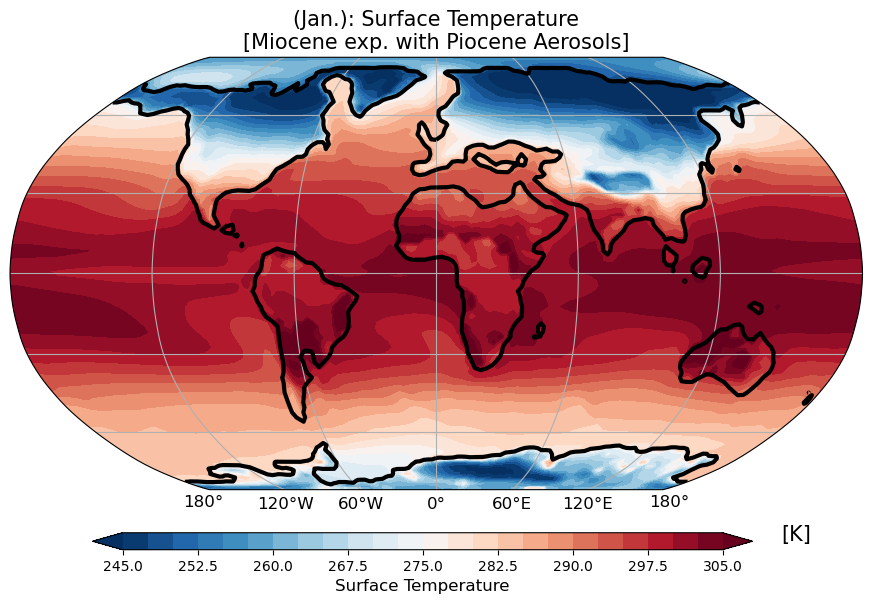

In [13]:
plot_title = '(Jan.): Surface Temperature\n[Miocene exp. with Piocene Aerosols]'
lev_min = 245
lev_max = 305
interval = 25
divnorm = colors.CenteredNorm(vcenter=275)

plot_map(data, plot_title, lev_min, lev_max, interval, divnorm)

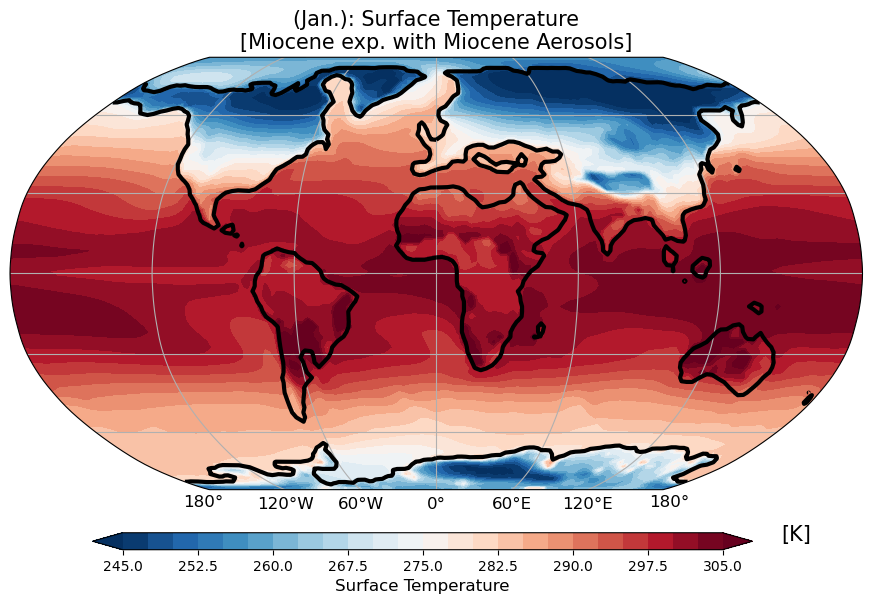

In [12]:
# read data - (Miocene exp. with Mio-aerosols)

path = '/scratch/pchen25/clim680_dataset/MidMiocene/atm/'
file_name = 'B.MMIOx2_C5_280_WISOon_aeroZonal_ANN_concat.nc'
ds = xr.open_dataset(path+file_name)

var = 'TS'
ts_Mio = ds[var]
ts_Mio_jan = ds[var][0,:,:]

# Add cyclic point to data
data = ts_Mio_jan
data, lons = add_cyclic_point(data, coord=ds['lon'])

plot_title = '(Jan.): Surface Temperature\n[Miocene exp. with Miocene Aerosols]'
lev_min = 245
lev_max = 305
interval = 25
divnorm = colors.CenteredNorm(vcenter=275)

plot_map(data, plot_title, lev_min, lev_max, interval, divnorm)

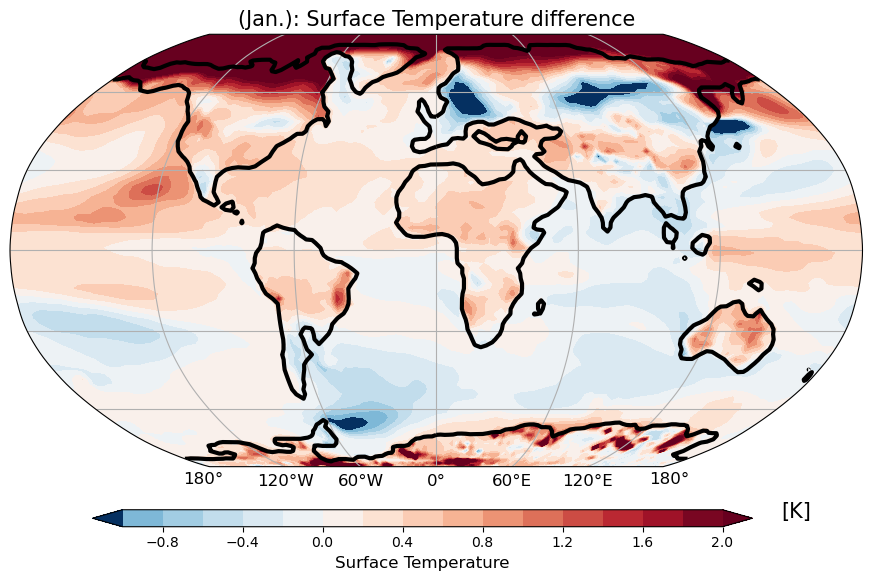

In [11]:
#ts_diff_jan = ts_Mio_jan.copy()
ts_diff_jan = ts_Mio_jan - ts_PI_jan


# Add cyclic point to data
data = ts_diff_jan
data, lons = add_cyclic_point(data, coord=ds['lon'])


# plot
plot_title = '(Jan.): Surface Temperature difference'
lev_min = -1
lev_max = 2
interval = 16
divnorm = colors.CenteredNorm(vcenter=0)

plot_map(data, plot_title, lev_min, lev_max, interval, divnorm)